# **A Quick Tutorial on AI Techniques**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2022-04-15
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---

## **Import Common Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Answer Function**

In [2]:
def print_answer(model, columns):
    import pandas as pd
    
    ANSWER_CSV_PATH = "./Ex1-Class-unseen.csv"
    answer_df = pd.read_csv(ANSWER_CSV_PATH)

    # NOTE: DATA PREPROCESSING
    answer_df = pd.get_dummies(answer_df, columns=["x3"])
    answer_df = pd.get_dummies(answer_df, columns=["x4"])
    answer_df = pd.get_dummies(answer_df, columns=["x5"])

    answer_df["x3_f"] = 0
    answer_df["x5_x"] = 0
    answer_df["x5_w"] = 0 

    print(model.predict(answer_df[columns].values))
    print(model.predict_proba(answer_df[columns].values))
    print(model.classes_)
    
    

## **Print Result Function**

In [3]:
def print_result(acc, prec, recall, f1, con, report, roc, loss):
    import seaborn as sns

    print("Accuracy :", acc)
    print("Precision :", prec)
    print("Recall :", recall)
    print("F1 :", f1)
    print("Confustion Matrix :\n", con)
    print("Classification Report :\n", report)
    print("Roc score :", roc)
    print("Log Loss :", loss)
    
    sns.heatmap(con, annot=True, cmap='Blues')


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

def print_score(y_test, y_pred, y_pred_proba, avg='micro', mt_class='ovr'):
    acc = accuracy_score(y_test, y_pred);
    prec = precision_score(y_test, y_pred, average=avg);
    recall = recall_score(y_test, y_pred, average=avg);
    f1 = f1_score(y_test, y_pred, average=avg);
    con = confusion_matrix(y_test, y_pred);
    report = classification_report(y_test, y_pred);
    roc = roc_auc_score(y_test, y_pred_proba,  multi_class=mt_class);
    loss = log_loss(y_test, y_pred_proba);

    print_result(acc, prec, recall, f1, con, report, roc, loss)

    return acc, prec, recall, f1, con, report, roc, loss


## **Data Cleaning**

         id     x1     x2 x3 x4 x5     x6     x7     x8     x9    x10  y
0    id-001  22.34   0.56  g  o  u   9.43  25.38 -20.91 -25.84   4.08  B
1    id-002  -2.31   7.36  i  p  y  -3.94    NaN  31.65  12.95   9.82  C
2    id-003 -17.55  -4.09  f  l  v -11.02  -1.77 -17.57  15.98  11.43  D
3    id-004 -13.54  -5.42  g  p  x   4.11   2.22  16.72   9.86  16.43  A
4    id-005  13.39  -3.20  i  l  v   2.23  11.76   1.34   4.16  -6.49  B
..      ...    ...    ... .. .. ..    ...    ...    ...    ...    ... ..
485  id-486  12.54   3.16  h  m  v  -3.49 -16.43  -3.70  -4.12  -2.83  D
486  id-487   8.10  -2.49  i  m  u -10.61  -1.63  -8.81  18.60  10.92  B
487  id-488  13.72 -10.59  i  m  y -32.73  -3.94    NaN   8.97  -8.30  C
488  id-489  -6.12  -6.37  e  m  u  22.34  -4.66 -10.86 -17.77  -0.21  C
489  id-490  -4.73 -10.89  g  n  x -20.01  16.22  -9.36   9.43  -2.02  B

[490 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 colu

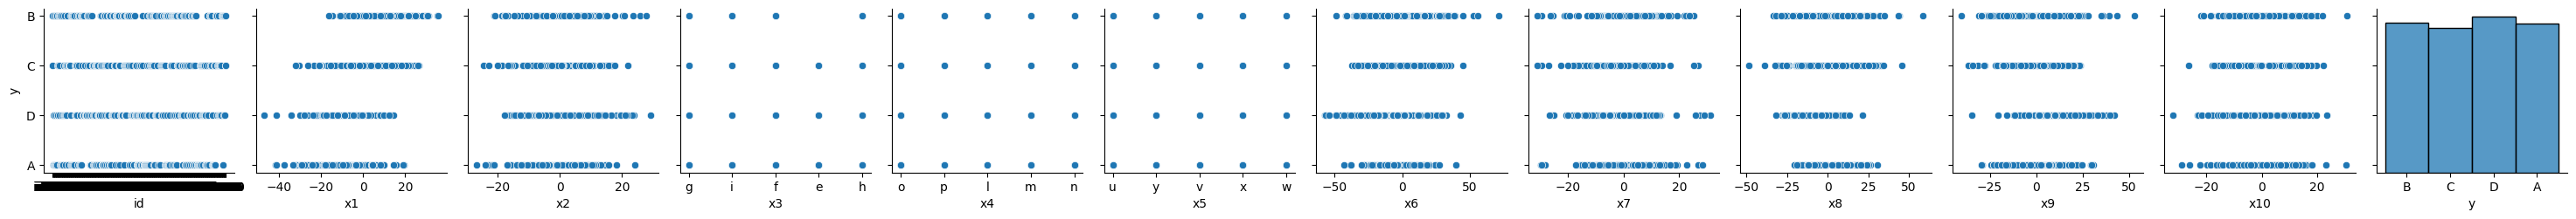

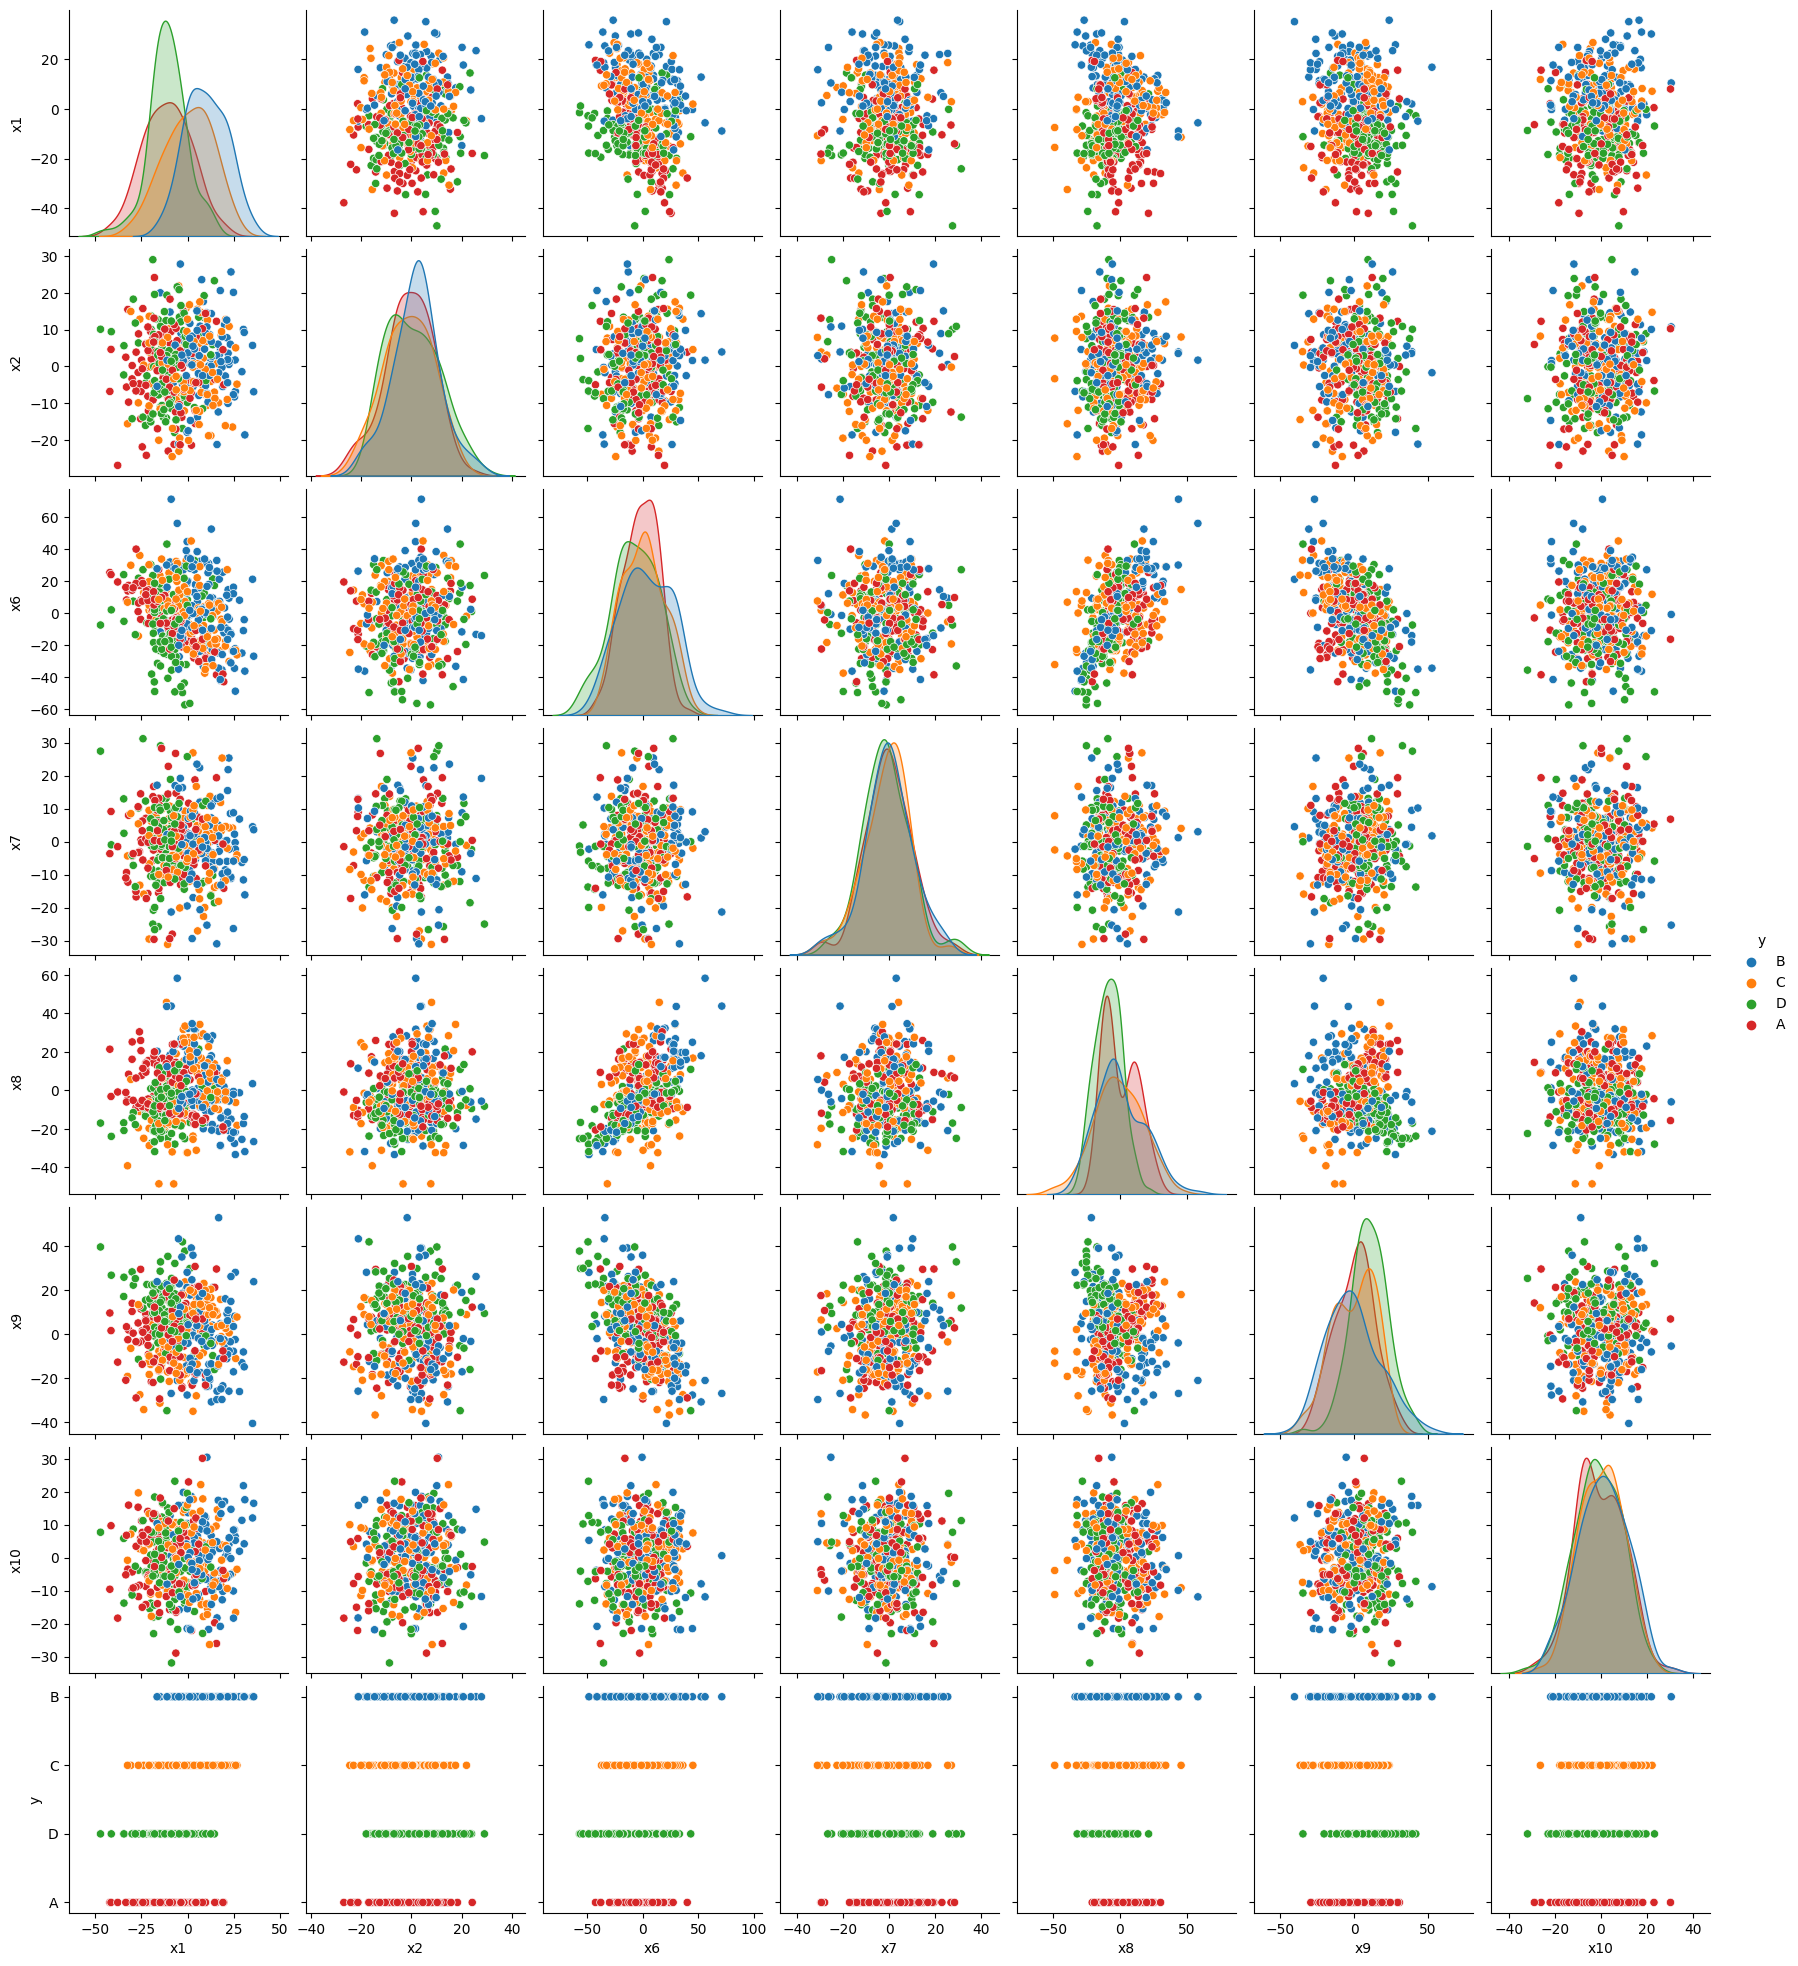

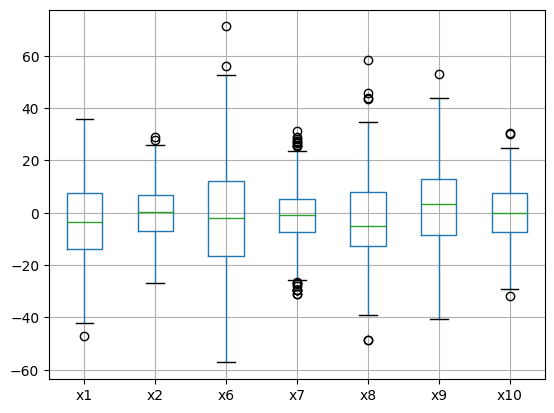

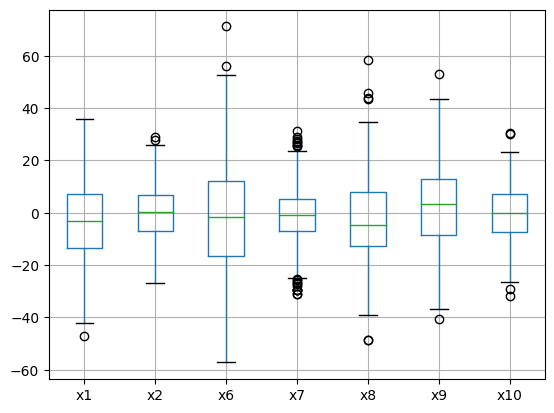

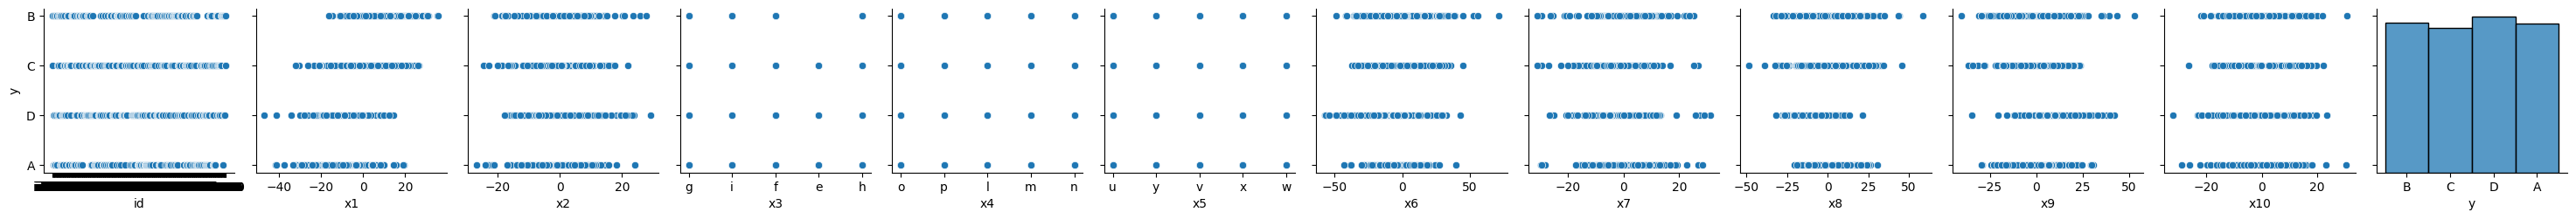

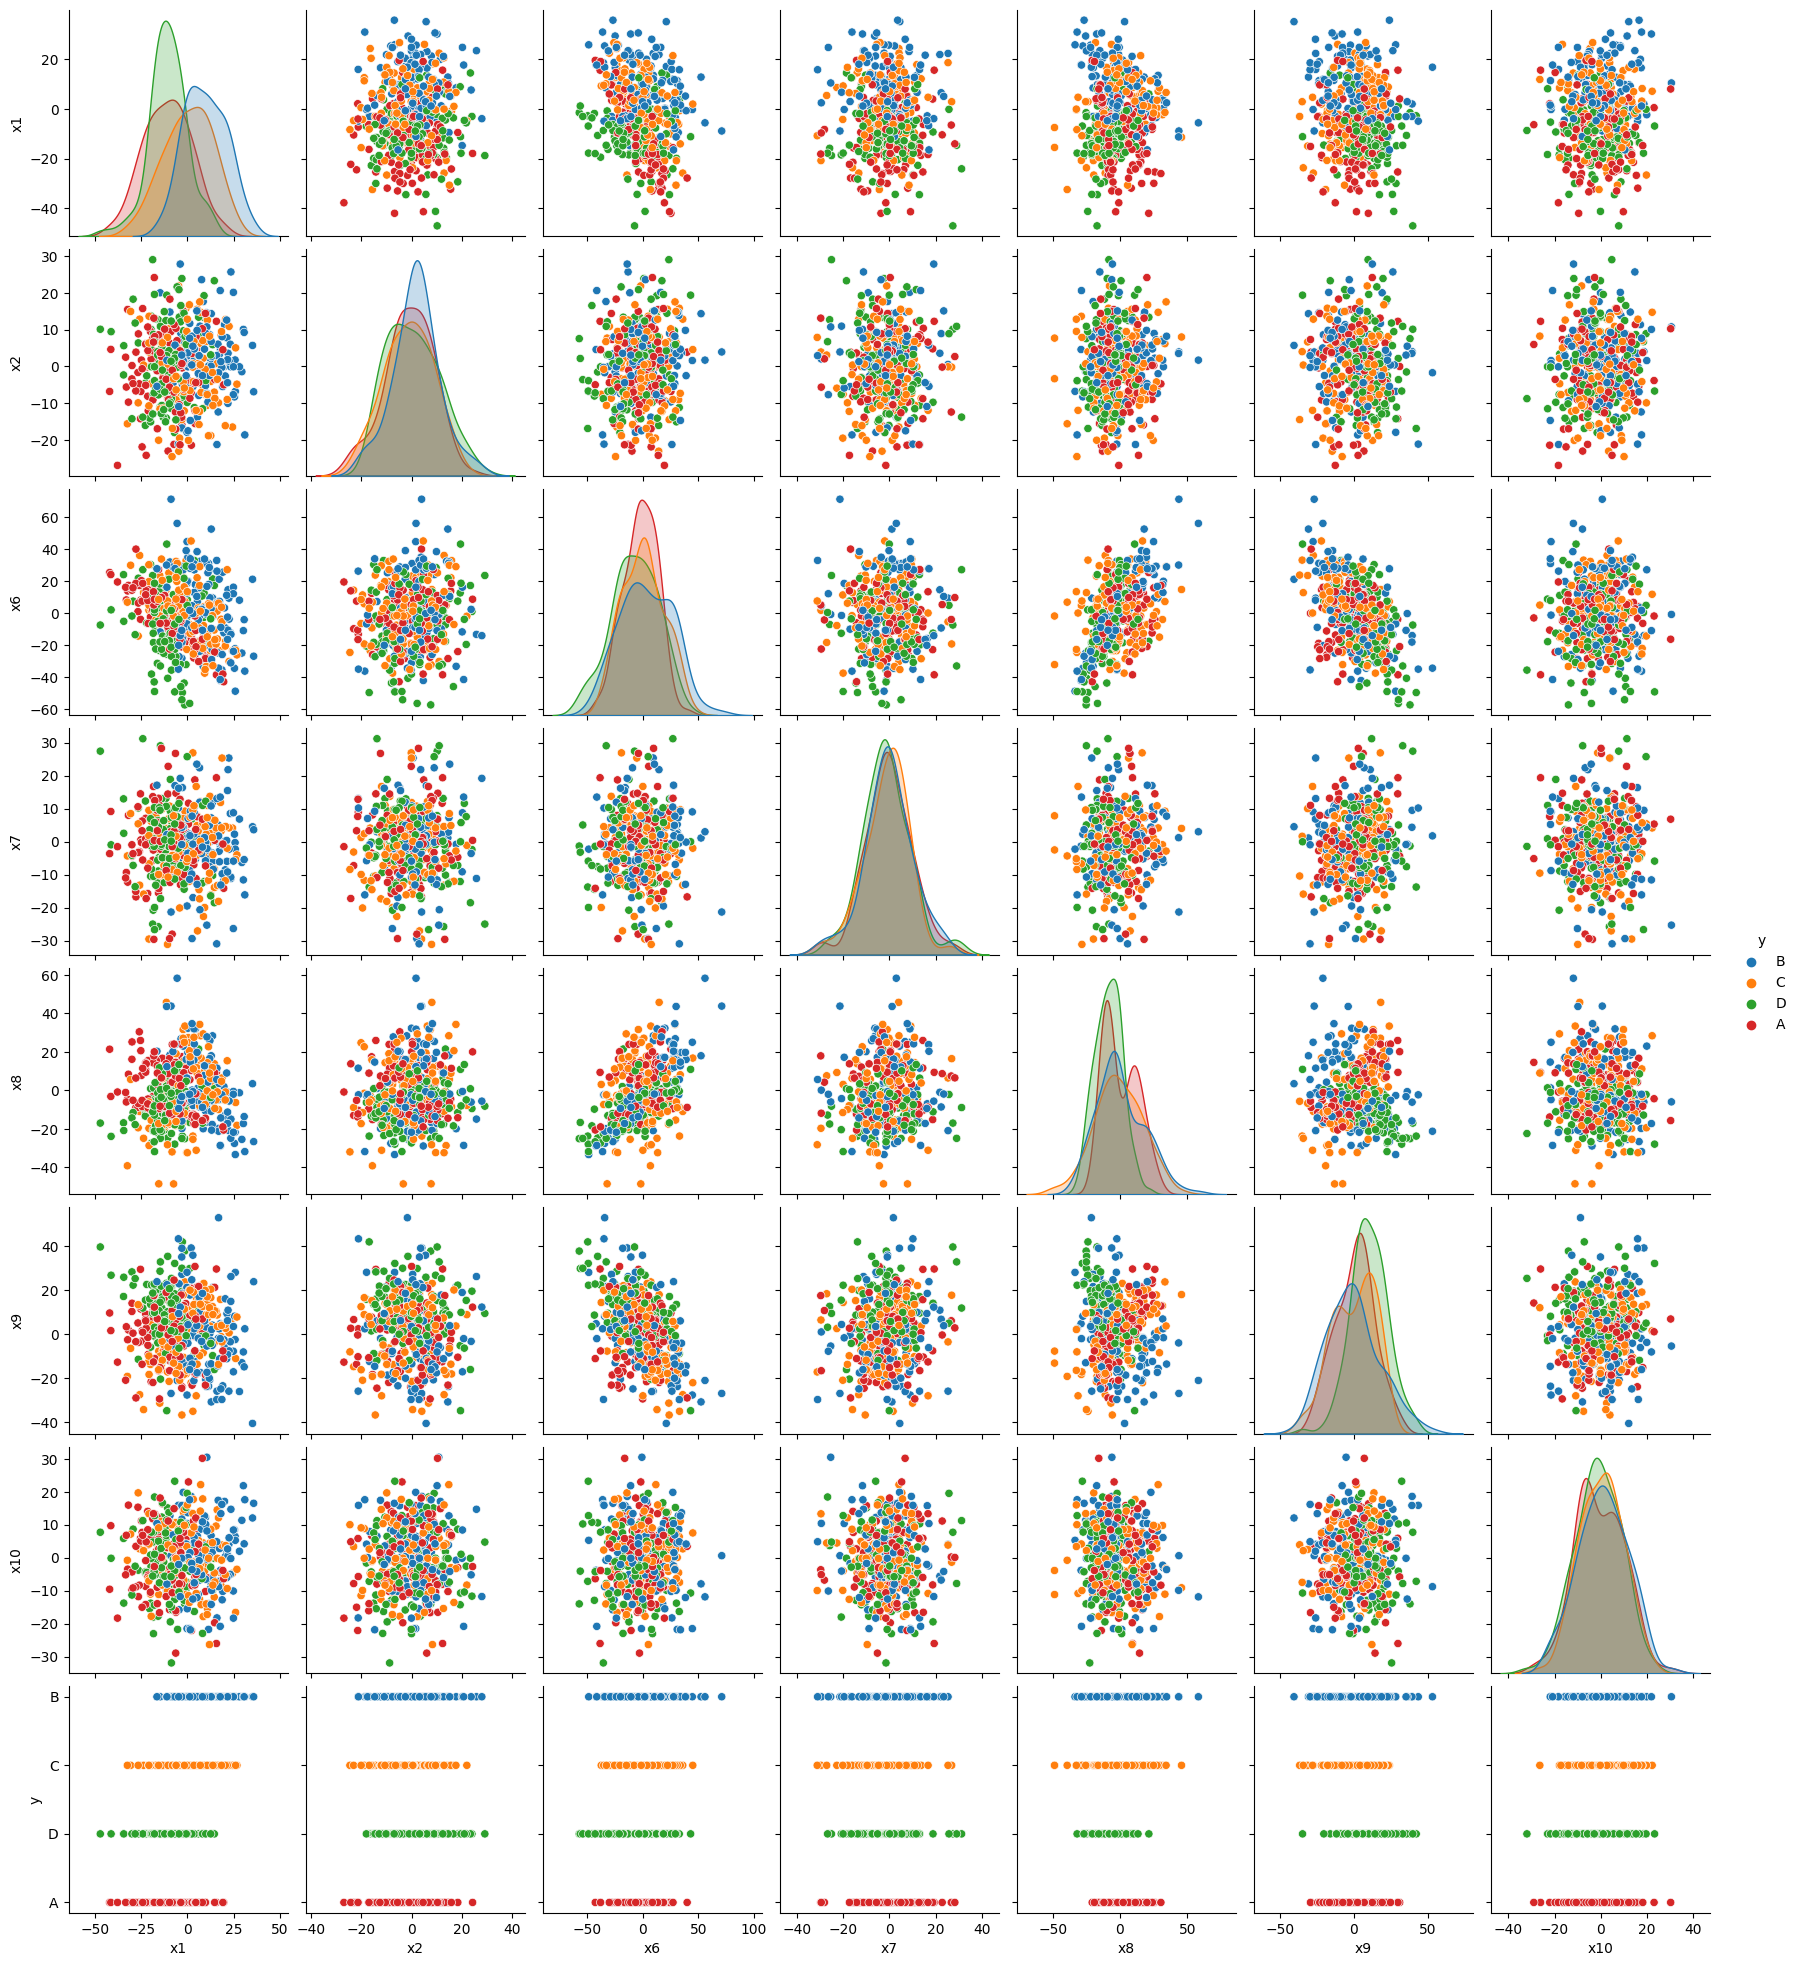

In [5]:
CSV_PATH = "./Ex1-Class-train.csv"
df = pd.read_csv(CSV_PATH)
print(df)
print(df.info())

# check data exploration
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

# BOXPLOT

boxplot_columns = ['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10']

# check data exploration all
sns.pairplot(df, x_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10'], y_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], hue="y")


plt.figure()
df.boxplot(column=boxplot_columns)


# CAP OUTLIERS
# for col in boxplot_columns:
#     low, high = df[col].quantile([0.05, 0.95])
#     df.loc[df[df[col] < low].index, col] = low
#     df.loc[df[df[col] > high].index, col] = high

# FILL VALUE
for col in boxplot_columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in ['x3', 'x4', 'x5']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# DROP VALUE
# drop if n/a for column y
df.dropna(subset=['y'], inplace=True)


# RESULT

# BOXPLOT
plt.figure()
df.boxplot(column=boxplot_columns)

# check data exploration
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

# check data exploration all
sns.pairplot(df, x_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10'], y_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], hue="y")

# print(df.sort_values(by=boxplot_columns));
print(df)
print(df.info())


### Train-Test Split

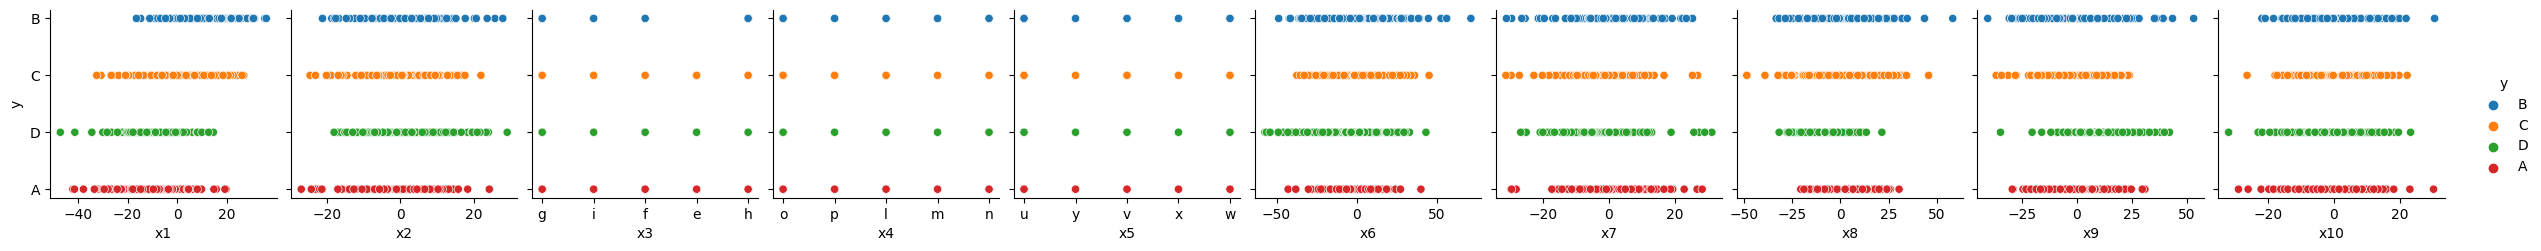

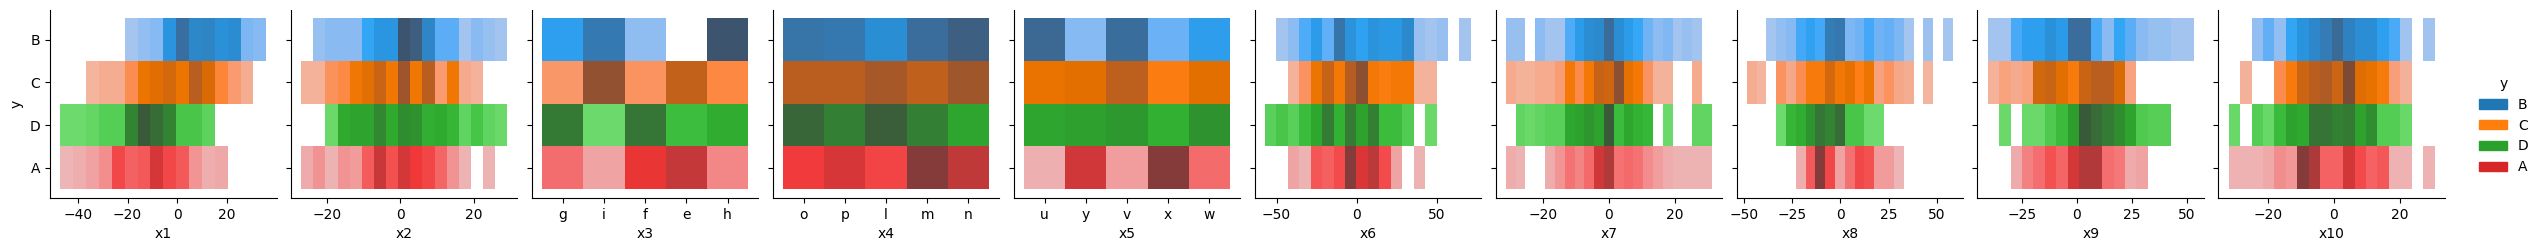

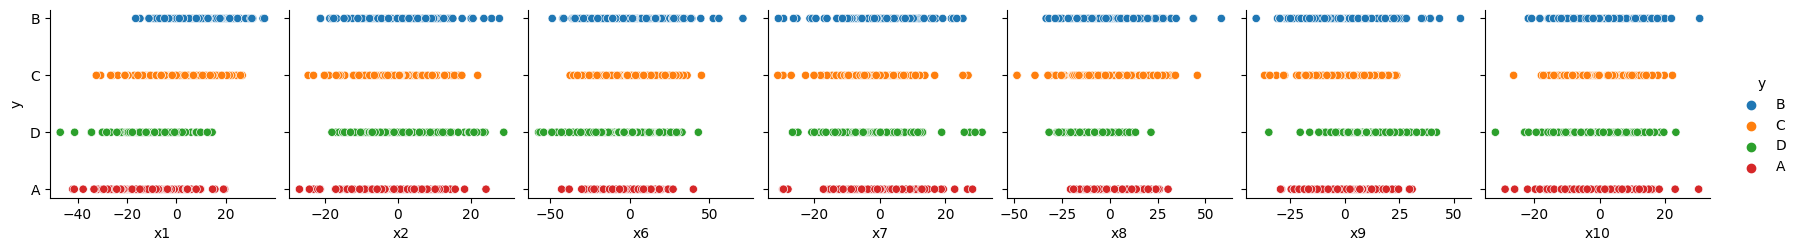

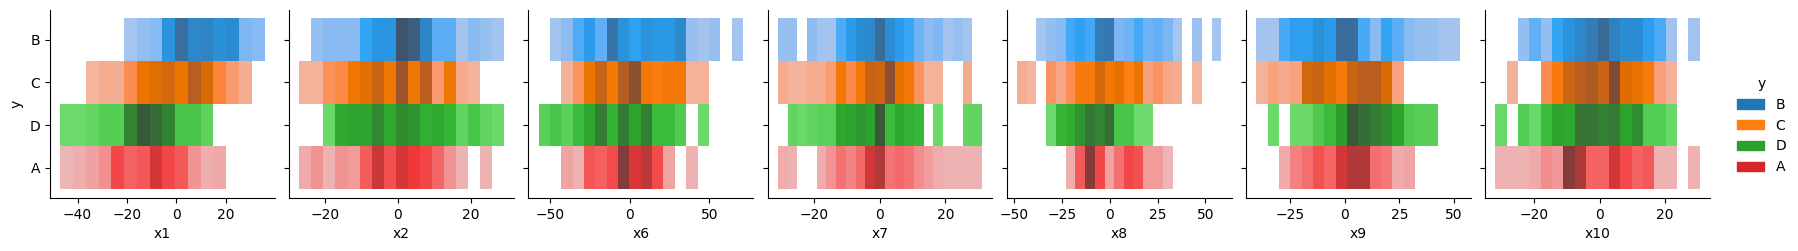

In [6]:
x_columns_all = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
x_columns = ["x1","x2","x6","x7","x8","x9","x10"]
#x_columns = ["x1","x8","x9"]
y_column = 'y';
X = df[x_columns]
y = df[y_column]

# plt.figure()
# sns.countplot(x="y", data=df,  hue="y");

# plt.figure()
# sns.countplot(x='x3', data=df,  hue="y");

# plt.figure()

# sns.countplot(x='x4', data=df,  hue="y");

# plt.figure()
# sns.countplot(x='x5', data=df,  hue="y");

# check data exploration
sns.pairplot(df, x_vars=x_columns_all, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns_all, y_vars=["y"], hue="y", kind="hist")

# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y", kind="hist")

In [7]:
from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# df['x3'] = lb_make.fit_transform(df['x3'])

df = pd.get_dummies(df, columns=["x3"])
df = pd.get_dummies(df, columns=["x4"])
df = pd.get_dummies(df, columns=["x5"])

In [8]:
df

id     x1     x2     x6         x7         x8     x9    x10  y  x3_e  \
0    id-001  22.34   0.56   9.43  25.380000 -20.910000 -25.84   4.08  B     0   
1    id-002  -2.31   7.36  -3.94  -0.931958  31.650000  12.95   9.82  C     0   
2    id-003 -17.55  -4.09 -11.02  -1.770000 -17.570000  15.98  11.43  D     0   
3    id-004 -13.54  -5.42   4.11   2.220000  16.720000   9.86  16.43  A     0   
4    id-005  13.39  -3.20   2.23  11.760000   1.340000   4.16  -6.49  B     0   
..      ...    ...    ...    ...        ...        ...    ...    ... ..   ...   
485  id-486  12.54   3.16  -3.49 -16.430000  -3.700000  -4.12  -2.83  D     0   
486  id-487   8.10  -2.49 -10.61  -1.630000  -8.810000  18.60  10.92  B     0   
487  id-488  13.72 -10.59 -32.73  -3.940000  -2.282812   8.97  -8.30  C     0   
488  id-489  -6.12  -6.37  22.34  -4.660000 -10.860000 -17.77  -0.21  C     1   
489  id-490  -4.73 -10.89 -20.01  16.220000  -9.360000   9.43  -2.02  B     0   

     ...  x4_l  x4_m  x4_n  x4_o  x4_p  x5_u  x5_v  x5_w  x5_x  x5_y  
0    ...     0     0     0     1     0     1     0     0     0     0  
1    ...     0     0     0     0     1     0     0     0     0     1  
2    ...     1     0     0     0     0     0     1     0     0     0  
3    ...     0     0     0     0     1     0     0     0     1     0  
4    ...     1     0     0     0     0     0     1     0     0     0  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
485  ...     0     1     0     0     0     0     1     0     0     0  
486  ...     0     1     0     0     0     1     0     0     0     0  
487  ...     0     1     0     0     0     0     0     0     0     1  
488  ...     0     1     0     0     0     1     0     0     0     0  
489  ...     0     0     1     0     0     0     0     0     1     0  

[480 rows x 24 columns]

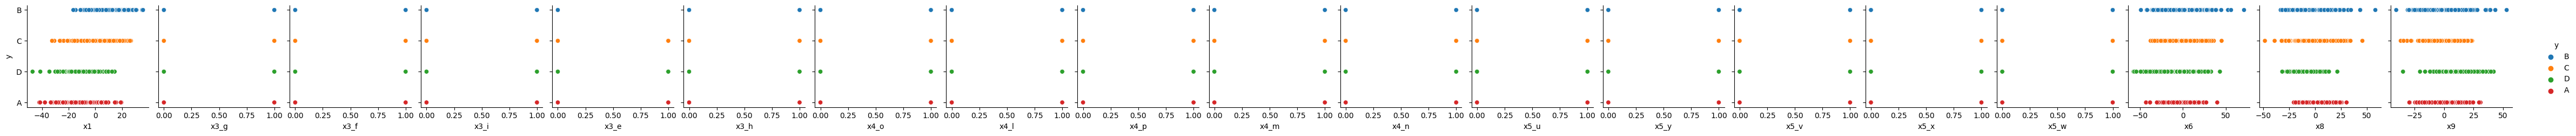

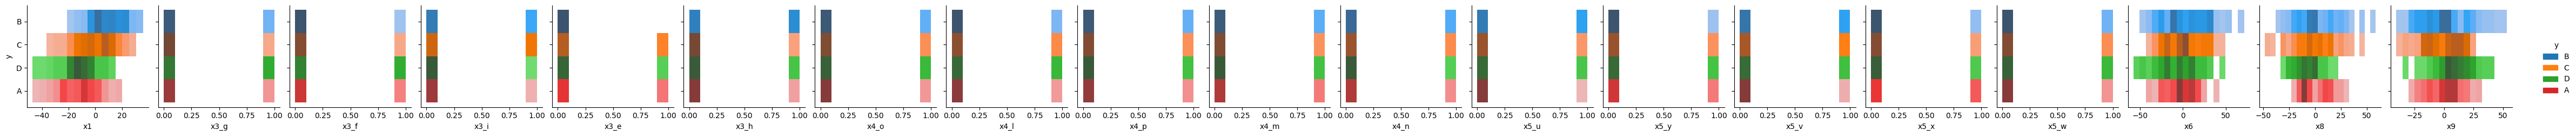

In [140]:
# NEW X_Columns 
x3Values = ['g','f','i','e','h']
x4Values = ['o' 'l' 'p' 'm' 'n']
x5Values = ['u', 'y', 'v', 'x', 'w']

# x_columns = ["x1","x2","x3_g","x3_f","x3_i","x3_e","x3_h","x4_o","x4_l","x4_p","x4_m","x4_n","x5_u","x5_y","x5_v","x5_x","x5_w","x6","x7","x8","x9","x10"]
# x_columns = ["x1","x3_g","x3_f","x3_i","x3_e","x3_h","x4_o","x4_l","x4_p","x4_m","x4_n","x5_u","x5_y","x5_v","x5_x","x5_w","x6","x8","x9"]
x_columns = ["x1","x3_g","x3_f","x3_i","x3_e","x3_h","x4_o","x4_l","x4_p","x4_m","x4_n","x5_u","x5_y","x5_v","x5_x","x5_w","x6","x8","x9"]
# x_columns = ["x1","x2","x6","x8","x9"]
X = df[x_columns]


# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y", kind="hist")

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## **Decision Tree**

### Import Libraries

In [271]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Model

In [272]:
model = DecisionTreeClassifier()

In [273]:
model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [274]:
print(tree.export_text(model))

|--- feature_0 <= -0.31
|   |--- feature_18 <= -4.51
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_17 <= 14.70
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- feature_16 <= 38.06
|   |   |   |   |   |   |--- feature_0 <= -15.56
|   |   |   |   |   |   |   |--- feature_0 <= -19.56
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: C
|   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: D
|   |   |   |   |   |   |   |--- feature_0 >  -19.56
|   |   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |--- feature_0 >  -15.56
|   |   |   |   |   |   |   |--- feature_16 <= 2.44
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: C
|   |   |   |   |   |   |   |--- feature_16 >  2.44
|   |   |   |   |  

### Prediction

In [275]:
# model.predict([[5,3,1,1]]) # NOTE : EDIT VALUE HERE

In [276]:
# model.predict_proba([[5,3,1,1]]) # NOTE : EDIT VALUE HERE

In [277]:
model.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

### Evaluation

In [278]:
y_pred = model.predict(X_test.values)

In [279]:
y_pred

array(['D', 'B', 'B', 'A', 'B', 'D', 'D', 'A', 'A', 'C', 'D', 'B', 'C',
       'A', 'C', 'C', 'A', 'D', 'A', 'D', 'B', 'C', 'C', 'D', 'C', 'A',
       'A', 'C', 'B', 'D', 'D', 'A', 'A', 'C', 'A', 'D', 'D', 'D', 'B',
       'C', 'B', 'A', 'D', 'D', 'D', 'D', 'D', 'B', 'B', 'C', 'A', 'B',
       'B', 'B', 'D', 'D', 'D', 'B', 'B', 'D', 'C', 'D', 'C', 'D', 'C',
       'A', 'C', 'A', 'D', 'B', 'B', 'C', 'A', 'B', 'D', 'A', 'D', 'A',
       'D', 'A', 'B', 'C', 'D', 'A', 'B', 'D', 'C', 'A', 'B', 'C', 'C',
       'D', 'D', 'B', 'B', 'A', 'C', 'A', 'C', 'A', 'A', 'B', 'D', 'B',
       'D', 'B', 'B', 'A', 'D', 'C', 'A', 'C', 'A', 'B', 'C', 'A', 'C',
       'C', 'C', 'B', 'D', 'C', 'D', 'A', 'C', 'C', 'B', 'C', 'C', 'A',
       'B', 'C', 'C', 'D', 'B', 'A', 'D', 'D', 'C', 'D', 'B', 'D', 'C',
       'C'], dtype=object)

Accuracy : 0.6388888888888888
Precision : 0.6388888888888888
Recall : 0.6388888888888888
F1 : 0.6388888888888888
Confustion Matrix :
 [[24  0  3  9]
 [ 2 23  8  1]
 [ 2  4 21  7]
 [ 4  6  6 24]]
Classification Report :
               precision    recall  f1-score   support

           A       0.75      0.67      0.71        36
           B       0.70      0.68      0.69        34
           C       0.55      0.62      0.58        34
           D       0.59      0.60      0.59        40

    accuracy                           0.64       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.65      0.64      0.64       144

Roc score : 0.7597242694669166
Log Loss : 13.015763723847861


(0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 array([[24,  0,  3,  9],
        [ 2, 23,  8,  1],
        [ 2,  4, 21,  7],
        [ 4,  6,  6, 24]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.75      0.67      0.71        36\n           B       0.70      0.68      0.69        34\n           C       0.55      0.62      0.58        34\n           D       0.59      0.60      0.59        40\n\n    accuracy                           0.64       144\n   macro avg       0.65      0.64      0.64       144\nweighted avg       0.65      0.64      0.64       144\n',
 0.7597242694669166,
 13.015763723847861)

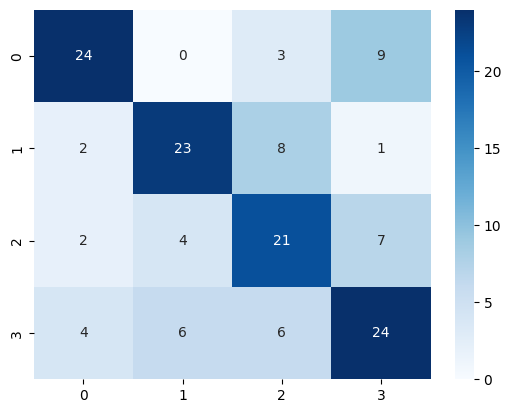

In [280]:
# Classification Metrics

y_pred_proba = model.predict_proba(X_test.values)

print_score(y_test, y_pred, y_pred_proba)

In [281]:
print_answer(model, x_columns)

['A' 'A' 'A' 'B' 'B' 'D' 'B' 'C' 'A' 'D']
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
['A' 'B' 'C' 'D']




---



## **Logistic Regression**

### Import Libraries

In [282]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

### Model

In [283]:
model = LogisticRegression()

In [284]:
model.fit(X_train.values, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [285]:
print("coef :", model.coef_)
print("intercept : ", model.intercept_)

coef : [[-0.07100536 -0.21957314  0.01755283 -0.30153709  0.79195782 -0.35430751
  -0.06468586 -0.38332163  0.06707057  0.292508    0.02252183 -0.28527016
   0.38461869 -0.92872768  0.78404002 -0.02056795 -0.04071236  0.03219142
  -0.03003283]
 [ 0.12141579  0.12642972 -0.08656543 -0.004519   -0.53659776  0.52091776
  -0.12057235 -0.21561232 -0.10570379  0.22549957  0.2360542   0.37795925
  -0.65638061  0.42591202 -0.2988128   0.17098743  0.03880914  0.00893886
   0.023459  ]
 [ 0.03861731 -0.7856588  -0.35401181  1.27880498  0.88264364 -0.66058268
  -0.08780995  0.07133385  0.14490415  0.08087171  0.15189557 -0.06621026
  -0.02363956  0.35477802  0.07703229  0.01923483  0.01760901 -0.00361679
  -0.01716615]
 [-0.08902775  0.87880222  0.42302441 -0.97274889 -1.1380037   0.49397242
   0.27306816  0.5276001  -0.10627092 -0.59887928 -0.4104716  -0.02647883
   0.29540148  0.14803764 -0.5622595  -0.16965432 -0.0157058  -0.0375135
   0.02373998]]
intercept :  [-0.12206205  0.02976296  0.5401

### Evaluation

Accuracy : 0.6597222222222222
Precision : 0.6597222222222222
Recall : 0.6597222222222222
F1 : 0.6597222222222222
Confustion Matrix :
 [[22  1  8  5]
 [ 1 21 11  1]
 [ 3  4 23  4]
 [ 3  7  1 29]]
Classification Report :
               precision    recall  f1-score   support

           A       0.76      0.61      0.68        36
           B       0.64      0.62      0.63        34
           C       0.53      0.68      0.60        34
           D       0.74      0.72      0.73        40

    accuracy                           0.66       144
   macro avg       0.67      0.66      0.66       144
weighted avg       0.67      0.66      0.66       144

Roc score : 0.8644693647553126
Log Loss : 0.9143774720999933


(0.6597222222222222,
 0.6597222222222222,
 0.6597222222222222,
 0.6597222222222222,
 array([[22,  1,  8,  5],
        [ 1, 21, 11,  1],
        [ 3,  4, 23,  4],
        [ 3,  7,  1, 29]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.76      0.61      0.68        36\n           B       0.64      0.62      0.63        34\n           C       0.53      0.68      0.60        34\n           D       0.74      0.72      0.73        40\n\n    accuracy                           0.66       144\n   macro avg       0.67      0.66      0.66       144\nweighted avg       0.67      0.66      0.66       144\n',
 0.8644693647553126,
 0.9143774720999933)

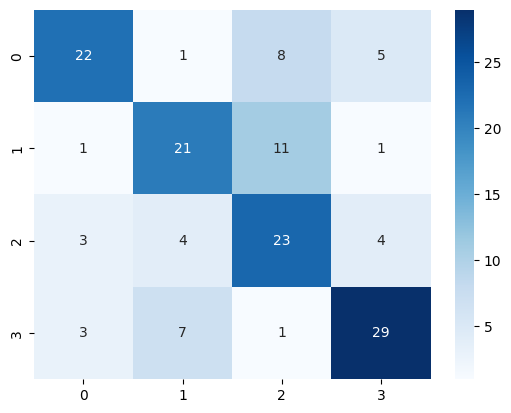

In [286]:
y_pred = model.predict(X_test.values)
y_pred_proba = model.predict_proba(X_test.values)

print_score(y_test, y_pred, y_pred_proba)

### Prediction

In [287]:
# print(" - predicted class:", model.predict([(5,3)])) # NOTE : EDIT VALUE HERE
# print(" - classes :", model.classes_)
# print(" - probabilities :", model.predict_proba([(5,3)]))
print_answer(model, x_columns)

['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'D']
[[6.22431428e-01 2.71594792e-03 2.37485050e-01 1.37367574e-01]
 [5.89957682e-01 2.74355225e-03 3.05349685e-01 1.01949081e-01]
 [7.88608950e-01 1.30164567e-03 1.43969841e-01 6.61195636e-02]
 [4.74979128e-03 8.37238043e-01 1.55235402e-01 2.77676425e-03]
 [9.25352930e-04 6.52887674e-01 3.45918882e-01 2.68090834e-04]
 [5.24974283e-02 5.06597768e-01 1.75760437e-01 2.65144366e-01]
 [2.42067448e-02 7.34712039e-02 8.99535929e-01 2.78612266e-03]
 [7.97461058e-02 2.62525992e-02 8.84336396e-01 9.66489909e-03]
 [5.18120229e-01 4.23855491e-03 4.31183695e-01 4.64575213e-02]
 [2.25429420e-02 1.48032806e-02 1.09921257e-02 9.51661652e-01]]
['A' 'B' 'C' 'D']




---



## **Naïve Bayes**

### Import Libraries

In [288]:
from sklearn.naive_bayes import GaussianNB

### Model

In [289]:
model = GaussianNB()

In [290]:
model.fit(X_train, y_train)

GaussianNB()

### Evaluation

Accuracy : 0.5
Precision : 0.5
Recall : 0.5
F1 : 0.5
Confustion Matrix :
 [[18  8  3  7]
 [ 1 32  0  1]
 [ 3 23  6  2]
 [ 4 18  2 16]]
Classification Report :
               precision    recall  f1-score   support

           A       0.69      0.50      0.58        36
           B       0.40      0.94      0.56        34
           C       0.55      0.18      0.27        34
           D       0.62      0.40      0.48        40

    accuracy                           0.50       144
   macro avg       0.56      0.50      0.47       144
weighted avg       0.57      0.50      0.47       144

Roc score : 0.8311905465857672
Log Loss : 2.8224547708243204


(0.5,
 0.5,
 0.5,
 0.5,
 array([[18,  8,  3,  7],
        [ 1, 32,  0,  1],
        [ 3, 23,  6,  2],
        [ 4, 18,  2, 16]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.69      0.50      0.58        36\n           B       0.40      0.94      0.56        34\n           C       0.55      0.18      0.27        34\n           D       0.62      0.40      0.48        40\n\n    accuracy                           0.50       144\n   macro avg       0.56      0.50      0.47       144\nweighted avg       0.57      0.50      0.47       144\n',
 0.8311905465857672,
 2.8224547708243204)

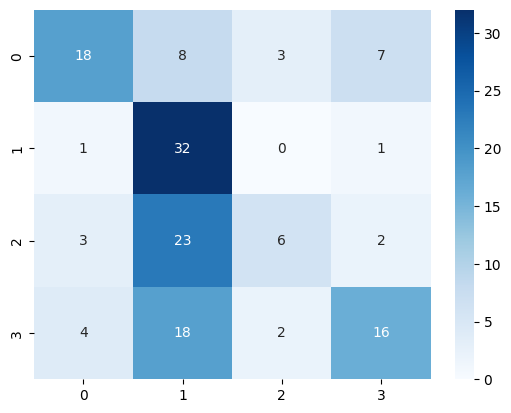

In [291]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

### Prediction

In [292]:
# print(" - predicted class:", model.predict([(5,3)])) # NOTE : EDIT VALUE HERE
# print(" - classes :", model.classes_)
# print(" - probabilities :", model.predict_proba([(5,3)]))
print_answer(model, x_columns)

['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'B']
[[6.95614097e-01 0.00000000e+00 1.44416810e-01 1.59969093e-01]
 [7.79655384e-01 0.00000000e+00 1.54295915e-01 6.60487008e-02]
 [9.72903627e-01 0.00000000e+00 1.67047972e-02 1.03915755e-02]
 [3.14806044e-10 9.99991516e-01 8.47715036e-06 7.02913285e-09]
 [2.69137187e-13 9.99605283e-01 3.94716536e-04 1.15942381e-24]
 [8.48509564e-09 9.99707271e-01 2.24970916e-05 2.70223012e-04]
 [6.81585014e-07 0.00000000e+00 9.99228856e-01 7.70462077e-04]
 [1.73492482e-05 0.00000000e+00 9.98837091e-01 1.14556024e-03]
 [7.43609063e-01 0.00000000e+00 2.34047457e-01 2.23434803e-02]
 [3.48142118e-08 9.41800935e-01 1.19780722e-04 5.80792492e-02]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## K-Nearest Neighbors

In [293]:
from sklearn.neighbors import KNeighborsClassifier

In [294]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy : 0.7291666666666666
Precision : 0.7291666666666666
Recall : 0.7291666666666666
F1 : 0.7291666666666665
Confustion Matrix :
 [[31  1  2  2]
 [ 3 25  4  2]
 [ 5  7 22  0]
 [ 6  5  2 27]]
Classification Report :
               precision    recall  f1-score   support

           A       0.69      0.86      0.77        36
           B       0.66      0.74      0.69        34
           C       0.73      0.65      0.69        34
           D       0.87      0.68      0.76        40

    accuracy                           0.73       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.74      0.73      0.73       144

Roc score : 0.9226801179900649
Log Loss : 1.3010864572214156


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(0.7291666666666666,
 0.7291666666666666,
 0.7291666666666666,
 0.7291666666666665,
 array([[31,  1,  2,  2],
        [ 3, 25,  4,  2],
        [ 5,  7, 22,  0],
        [ 6,  5,  2, 27]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.69      0.86      0.77        36\n           B       0.66      0.74      0.69        34\n           C       0.73      0.65      0.69        34\n           D       0.87      0.68      0.76        40\n\n    accuracy                           0.73       144\n   macro avg       0.74      0.73      0.73       144\nweighted avg       0.74      0.73      0.73       144\n',
 0.9226801179900649,
 1.3010864572214156)

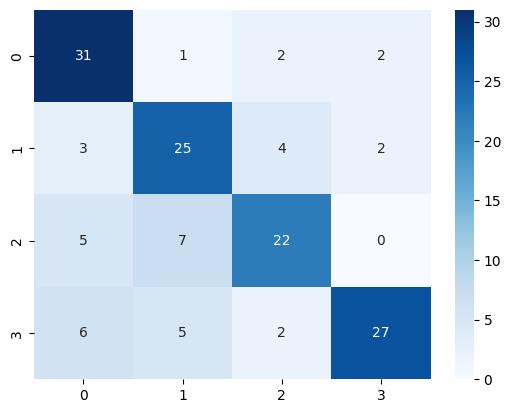

In [295]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

In [296]:
print_answer(model, x_columns)

['A' 'A' 'A' 'B' 'B' 'D' 'C' 'C' 'A' 'D']
[[0.71428571 0.         0.         0.28571429]
 [0.85714286 0.         0.         0.14285714]
 [0.71428571 0.         0.         0.28571429]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.         0.42857143 0.57142857]
 [0.         0.28571429 0.57142857 0.14285714]
 [0.         0.14285714 0.85714286 0.        ]
 [0.71428571 0.14285714 0.         0.14285714]
 [0.         0.         0.         1.        ]]
['A' 'B' 'C' 'D']


## Artificial Neural Network

In [297]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [298]:
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation="tanh")
model.fit(X_train.values, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=1000)

Accuracy : 0.6597222222222222
Precision : 0.6597222222222222
Recall : 0.6597222222222222
F1 : 0.6597222222222222
Confustion Matrix :
 [[25  1  7  3]
 [ 1 19 14  0]
 [ 3  2 26  3]
 [ 3  7  5 25]]
Classification Report :
               precision    recall  f1-score   support

           A       0.78      0.69      0.74        36
           B       0.66      0.56      0.60        34
           C       0.50      0.76      0.60        34
           D       0.81      0.62      0.70        40

    accuracy                           0.66       144
   macro avg       0.69      0.66      0.66       144
weighted avg       0.69      0.66      0.66       144

Roc score : 0.8725107104753755
Log Loss : 1.0872170691457752


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


(0.6597222222222222,
 0.6597222222222222,
 0.6597222222222222,
 0.6597222222222222,
 array([[25,  1,  7,  3],
        [ 1, 19, 14,  0],
        [ 3,  2, 26,  3],
        [ 3,  7,  5, 25]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.78      0.69      0.74        36\n           B       0.66      0.56      0.60        34\n           C       0.50      0.76      0.60        34\n           D       0.81      0.62      0.70        40\n\n    accuracy                           0.66       144\n   macro avg       0.69      0.66      0.66       144\nweighted avg       0.69      0.66      0.66       144\n',
 0.8725107104753755,
 1.0872170691457752)

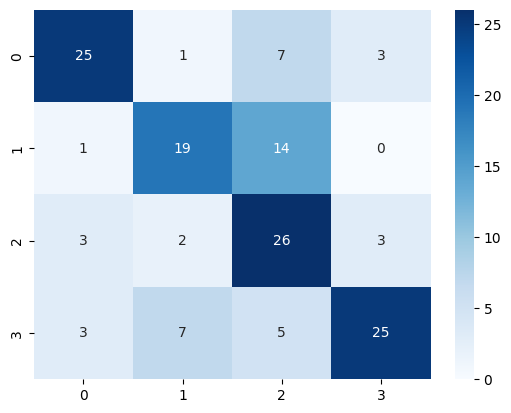

In [299]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

In [300]:

print_answer(model, x_columns)

['D' 'D' 'A' 'B' 'B' 'D' 'C' 'C' 'D' 'D']
[[7.05434489e-03 4.33060326e-03 1.22014471e-03 9.87394907e-01]
 [4.38946968e-01 4.87437721e-02 3.11216095e-02 4.81187651e-01]
 [9.68297580e-01 8.21360327e-03 7.74692646e-03 1.57418904e-02]
 [1.66975470e-04 9.91279601e-01 8.49361496e-03 5.98084888e-05]
 [3.84069783e-05 9.00568325e-01 9.09024076e-02 8.49086071e-03]
 [7.22831287e-05 4.09470327e-03 9.02529980e-02 9.05580016e-01]
 [2.06351227e-01 1.05452196e-02 7.80018181e-01 3.08537302e-03]
 [2.41508524e-03 1.61762488e-02 9.80715194e-01 6.93472126e-04]
 [7.95824458e-04 1.77450847e-01 8.50588383e-03 8.13247444e-01]
 [3.14447179e-03 1.68032938e-03 2.00038907e-02 9.75171308e-01]]
['A' 'B' 'C' 'D']


## K-Fold Cross-Validation

In [301]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

In [302]:
kf = KFold(n_splits=4)

In [303]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []


for train_index, test_index in kf.split(X):

  # print(train_index, test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')
  con = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("Accuracy (k) :", acc)
  print("Precision (k) :", prec)
  print("Recall (k) :", recall)
  print("F1 (k) :", f1)
  print("Confustion Matrix (k) :\n", con)
  print("Classification Report (k) :\n", report)
  acc_list.append(acc)
  prec_list.append(prec)
  recall_list.append(recall)
  f1_list.append(f1)

print("------------------------------------")
print("Mean Accuracy :", np.mean(acc_list))
print("Mean Precision :", np.mean(prec_list))
print("Mean Recall :", np.mean(recall_list))
print("Mean F1 :", np.mean(f1_list))

Accuracy (k) : 0.6333333333333333
Precision (k) : 0.6333333333333333
Recall (k) : 0.6333333333333333
F1 (k) : 0.6333333333333333
Confustion Matrix (k) :
 [[19  2  2  5]
 [ 0 18 13  1]
 [ 2  1 23  1]
 [ 5  8  4 16]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.73      0.68      0.70        28
           B       0.62      0.56      0.59        32
           C       0.55      0.85      0.67        27
           D       0.70      0.48      0.57        33

    accuracy                           0.63       120
   macro avg       0.65      0.64      0.63       120
weighted avg       0.65      0.63      0.63       120

Accuracy (k) : 0.6166666666666667
Precision (k) : 0.6166666666666667
Recall (k) : 0.6166666666666667
F1 (k) : 0.6166666666666667
Confustion Matrix (k) :
 [[21  1  3  3]
 [ 4 16  3  6]
 [ 9  6 13  1]
 [ 6  1  3 24]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.5

In [304]:
print_answer(model, x_columns)

['D' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'D']
[[8.64110554e-02 9.03455373e-14 2.32343197e-03 9.11265513e-01]
 [9.99997532e-01 9.28238331e-14 2.45905179e-06 8.76368217e-09]
 [9.99395251e-01 2.07447024e-12 5.01190637e-12 6.04748559e-04]
 [4.45123088e-47 9.04099728e-01 9.58972786e-02 2.99341075e-06]
 [1.60040604e-52 9.81011984e-01 1.89880164e-02 4.64066784e-19]
 [3.27146259e-17 5.20846610e-01 9.69425837e-03 4.69459132e-01]
 [1.51133770e-46 1.26992786e-07 9.99999873e-01 1.12558354e-19]
 [8.51268281e-21 2.69491720e-19 1.00000000e+00 5.09960988e-12]
 [9.99899016e-01 1.91224815e-07 1.00792559e-04 5.06618719e-12]
 [3.97136581e-17 1.17649469e-03 3.60245769e-10 9.98823505e-01]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [305]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []


for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')
  con = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("Accuracy (k) :", acc)
  print("Precision (k) :", prec)
  print("Recall (k) :", recall)
  print("F1 (k) :", f1)
  print("Confustion Matrix (k) :\n", con)
  print("Classification Report (k) :\n", report)
  acc_list.append(acc)
  prec_list.append(prec)
  recall_list.append(recall)
  f1_list.append(f1)

print("------------------------------------")
print("Mean Accuracy :", np.mean(acc_list))
print("Mean Precision :", np.mean(prec_list))
print("Mean Recall :", np.mean(recall_list))
print("Mean F1 :", np.mean(f1_list))

Accuracy (k) : 0.6416666666666667
Precision (k) : 0.6416666666666667
Recall (k) : 0.6416666666666667
F1 (k) : 0.6416666666666667
Confustion Matrix (k) :
 [[19  1  4  4]
 [ 1 18  9  4]
 [ 3  2 20  2]
 [ 3  7  3 20]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.73      0.68      0.70        28
           B       0.64      0.56      0.60        32
           C       0.56      0.74      0.63        27
           D       0.67      0.61      0.63        33

    accuracy                           0.64       120
   macro avg       0.65      0.65      0.64       120
weighted avg       0.65      0.64      0.64       120

Accuracy (k) : 0.6583333333333333
Precision (k) : 0.6583333333333333
Recall (k) : 0.6583333333333333
F1 (k) : 0.6583333333333333
Confustion Matrix (k) :
 [[19  1  2  6]
 [ 4 17  1  7]
 [ 4  4 18  3]
 [ 5  2  2 25]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.5

In [306]:

print_answer(model, x_columns)

['A' 'A' 'A' 'B' 'B' 'C' 'B' 'C' 'B' 'D']
[[6.97614227e-01 8.33520758e-02 1.71496057e-02 2.01884091e-01]
 [8.72538018e-01 8.28551262e-04 1.26516248e-01 1.17182981e-04]
 [8.29671495e-01 8.02892282e-02 9.00389713e-02 3.05130910e-07]
 [1.09158022e-93 9.92486270e-01 7.51372973e-03 3.97772306e-23]
 [1.12119058e-27 9.99998703e-01 1.29680710e-06 2.96274344e-12]
 [5.84300563e-26 2.11028656e-33 9.99909660e-01 9.03398686e-05]
 [4.36754898e-30 9.99972912e-01 2.70874941e-05 3.69800298e-11]
 [1.57431632e-07 2.77155989e-17 9.99999843e-01 5.81461014e-39]
 [2.32529123e-04 9.91712096e-01 8.04152866e-03 1.38458535e-05]
 [3.49629029e-07 1.40043755e-05 6.40300742e-04 9.99345345e-01]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


## Comparisions

In [307]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [308]:
# Decision Tree

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Decision Tree")
print(" Mean Accuracy :", np.mean(acc_list))

------------------------------------
Decision Tree
 Mean Accuracy : 0.6166666666666667


In [309]:
# Logistic Regression

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LogisticRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Logistic Regression")
print(" Mean Accuracy :", np.mean(acc_list))

------------------------------------
Logistic Regression
 Mean Accuracy : 0.6354166666666666


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [310]:
# Neural Network

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] # TODO: FIX iloc

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Neural Network")
print("  Mean Accuracy :", np.mean(acc_list))

------------------------------------
Neural Network
  Mean Accuracy : 0.6854166666666666


## K-Fold Cross Validation 
### Computing cross-validated metrics

In [311]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [312]:
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
scores = cross_val_score(model, X, y, cv=4, scoring="accuracy")

print("Mean Accuracy :", np.mean(scores))

Mean Accuracy : 0.6604166666666667


### ANSWER (8:2, 7:3)
Tree: 0.55<br />
['A' 'A' 'A' 'B' 'B' 'D' 'B' 'C' 'A' 'D']<br />
Tree: 0.63<br />
['A' 'A' 'A' 'B' 'B' 'D' 'B' 'C' 'A' 'D']<br />

LogisticRegression: 0.65<br />
['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'D']<br />
LogisticRegression: 0.66<br />
['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'D']<br />

Naive Bayes: 0.45<br />
['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'B']<br />
Naive Bayes: 0.5<br />
['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'B']<br />

K-NN: 0.79<br />
['A' 'A' 'A' 'B' 'B' 'D' 'B' 'C' 'A' 'D']  (Accurate)<br />
K-NN: 0.73<br />
['A' 'A' 'A' 'B' 'B' 'D' 'C' 'C' 'A' 'D']<br />


Aritificial Neural Network: 0.72<br />
['D' 'D' 'A' 'B' 'B' 'C' 'C' 'C' 'A' 'D']<br />
Aritificial Neural Network: 0.66<br />
['D' 'D' 'A' 'B' 'B' 'D' 'C' 'C' 'D' 'D']<br />

K-Fold (1): 0.69<br />
['D' 'A' 'A' 'B' 'B' 'C' 'B' 'C' 'C' 'D']<br />
K-Fold (1): 0.66<br />
['D' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'A' 'D']<br />

K-Fold (2): 0.70<br />
['D' 'D' 'A' 'B' 'B' 'C' 'C' 'C' 'D' 'D']<br />
K-Fold (2): 0.68<br />
['A' 'A' 'A' 'B' 'B' 'C' 'B' 'C' 'B' 'D']<br />

Summarise (by Pop)<br />
['A' 'A' 'A' 'B' 'B' 'D' 'C' 'C' 'A' 'D'] (K-NN, Aritificial Neural Network) <br />
[ X   X   _   _   _   _   X   _   X   _ ] <br />

Real answer (score X/10) <br />  
XXX



---
https://rathachai.creatier.pro/

## つづく